# PREDICTION AUTOMOTIVE ACCIDENT SEVERITY


## Importation des librairies

In [1]:
# Dans cette partie j'ai procédé à l'importation de toutes les librairies dont j'ai besoin durant 
# la suite du projet que j'ai divisé en librairies générales , celle de ré-échantillage 
# mais également celles que j'ai utilisé pour la standardisation , corss validation , arbre de déscision...


* Librairies générales

In [3]:
import numpy as np
import pandas as pd

In [4]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
import warnings
warnings.filterwarnings("ignore")

* Ré-échantillage

In [4]:
import matplotlib.pyplot as plt   
from pydotplus import graph_from_dot_data
from IPython.display import Image  
import seaborn as sns
from IPython.display import HTML, display
import tabulate

* PLOTS, TABS

In [7]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

* STANDARDIZATION, PCA ANALYSIS

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

* CROSS- VALIDATION

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

* DECISION TREE/ RANDOM FOREST

In [10]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor

* NEURAL NETWORK

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.python.keras import utils
from sklearn.preprocessing import LabelEncoder

* KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

* LOGISTIC REGRESSION

In [10]:
from sklearn.linear_model import LogisticRegression

## DATA PREPROCESSING 

In [2]:
# Pour commencer je vais lire les trois fichiers contenant nos données  et fusionner par la suite
# ces derniers au sein d'un seul fichier 

In [5]:
#lecture de fichiers de données
df1 = pd.read_csv('data/2014 excel.csv')
df2 = pd.read_csv('data/2015 excel.csv')
df3 = pd.read_csv('data/2016 excel.csv')

# fusion de fichiers de données
frames = [df1, df2, df3]
result = pd.concat(frames, axis=0)

In [6]:
result.head(10)

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Expr1,Accident Date,Day,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,12N1424,435232,427614,1,NaN,23/02/2014,Sunday,1840,Unclassified,Dry,Darkness no street lighting,Fine without high winds,Driver,Serious,Male,19,Car
1,12N1424,435232,427614,1,NaN,23/02/2014,Sunday,1840,Unclassified,Dry,Darkness no street lighting,Fine without high winds,Passenger,Serious,Male,19,Car
2,1380117,435678,440221,1,NaN,08/03/2014,Saturday,130,A,Dry,Darkness no street lighting,Fine without high winds,Driver,Serious,Male,21,Car
3,1370105,422649,440068,1,NaN,07/03/2014,Friday,235,Unclassified,Wet or Damp,Darkness no street lighting,Fine without high winds,Driver,Slight,Male,23,Car
4,140007543,441116,449118,2,NaN,07/01/2014,Tuesday,240,A(M),Wet or Damp,Darkness no street lighting,Fine with high winds,Driver,Serious,Male,60,Goods vehicle 7.5 tonnes mgw and over
5,140007543,441116,449118,2,NaN,07/01/2014,Tuesday,240,A(M),Wet or Damp,Darkness no street lighting,Fine with high winds,Driver,Serious,Male,41,Goods vehicle 7.5 tonnes mgw and over
6,140007543,441116,449118,2,NaN,07/01/2014,Tuesday,240,A(M),Wet or Damp,Darkness no street lighting,Fine with high winds,Passenger,Slight,Male,61,Goods vehicle 7.5 tonnes mgw and over
7,140044738,426571,433921,2,NaN,01/02/2014,Saturday,1728,Unclassified,Wet or Damp,Darkness no street lighting,Other,Driver,Slight,Male,26,Pedal cycle
8,140222955,443107,440721,1,NaN,26/12/2014,Friday,2158,A(M),Snow,Darkness no street lighting,Snowing without high winds,Driver,Slight,Male,23,Car
9,14A1433,432930,436036,1,NaN,10/04/2014,Thursday,1840,A,Dry,Darkness no street lighting,Fine without high winds,Pedestrian,Slight,Male,7,Car


In [7]:
#Il y a des colonnes inutiles et il y a des colonnes avec des valeurs qui manquen donc
# il est important de les supprimer ainsi traiter nos données avant des les utiliser 
# pour garantir une cohérence 

In [65]:
# suppression de colonnes inutiles
result= result.drop(['Grid Ref: Northing','Grid Ref: Easting','Reference Number','Expr1','Accident Date','Lighting Conditions','1st Road Class'],axis=1)

#suppression des colonnes avec valeurs manquantes
result= result.dropna(axis=0)

In [8]:
# Créer des listes pour les valeurs autres que que les float ou int 

In [66]:
# lister les objets pour le traitement ultérieur
list1=['Monday','Tuesday','Wednesday','Thursday']
list2=['Friday','Saturday','Sunday']
list3=['Fine without high winds','Fine with high winds']
list4=['Snowing without high winds','Snowing with high winds']
list5=['Raining without high winds','Raining with high winds']
list6=['Fog or mist']
list7=['Minibus (8 to 16 passenger seats)','Bus or coach (17 or more passenger seats)']
list8=['Goods vehicle 3.5 tonnes mgw and under','Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw','goods','Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw']
list9=['Motorcycle over 50cc and up to 125cc','Motorcycle over 125cc and up to 500cc','M cycle 50cc and under','Motorcycle over 500cc','Motorcycle Unknown CC']
list10=['Car','Taxi or Private hire car']
list11=['Driver', 'Driver ']
list12=['Pedestrian']

In [67]:
#convertir la fonction 'Jour'
def b(row):
    if row['Day']in list1:
        val='weekday'
    elif row['Day']in list2:
        val='weekend'
    return val
result['Day'] = result.apply(b, axis=1)

#conversion de la fonction «Conditions météorologiques»
def e(row):
    if row['Weather Conditions']in list3:
        val='fine'
    elif row['Weather Conditions']in list4:
        val='snowing'
    elif row['Weather Conditions']in list5:
        val='raining'
    elif row['Weather Conditions']in list6:
        val='fog'
    else: 
        val='other'   
    return val
result['Weather Conditions'] = result.apply(e, axis=1)


#conversion de la fonction 'Type de véhicule'

def j(row):
    if row['Type of Vehicle']in list7:
        val='bus'
    elif row['Type of Vehicle']in list8:
        val='goods vehicle'
    elif row['Type of Vehicle']in list9:
        val='motorcycle'
    elif row['Type of Vehicle']in list10:
        val='car'
    else: 
        val='other'
    return val
result['Type of Vehicle'] = result.apply(j, axis=1)

#converting 'Time (24hr)
def c(row):
    if 600< row['Time (24hr)'] <= 1801:
        val='Day-time'
    else:
        val='Night-time'
    return val
result['Time (24hr)'] = result.apply(c, axis=1)

#conversion de la fonction 'Casualty Class'
def a(row):
    if row['Casualty Class']in list11:
        val='Driver'
    elif row['Casualty Class']in list12:
        val='Pedestrian'
    else: 
        val='Passenger'
    return val
result['Casualty Class'] = result.apply(a, axis=1)

#création de variables fictives pour les variales de catégorie
result=pd.get_dummies(result,columns=['Day','Time (24hr)','Road Surface','Weather Conditions','Casualty Class','Sex of Casualty','Type of Vehicle'])

# traiter des colonnes contenant les mêmes informations
result = result.drop(['Day_weekday', 'Time (24hr)_Day-time', 'Sex of Casualty_Female'] , axis=1)

## Ré-échantillage

In [68]:
result['Casualty Severity'].value_counts()

Slight     6739
Serious     957
Fatal        48
Name: Casualty Severity, dtype: int64

In [69]:
seed=12345
np.random.seed(seed)

In [70]:
# division du jeu de données en deux: variables dépendantes de X et variable dépendantes de y
X = result.drop('Casualty Severity', axis=1)
y = result['Casualty Severity']

In [71]:
# suréchantillonnage de la classe 'Fatal' à la classe 'Serious'
array = ['Slight', 'Serious']
result_a=result.loc[result['Casualty Severity'].isin(array)]
X_a = result_a.drop('Casualty Severity', axis=1)
y_a = result_a['Casualty Severity']
sm = RandomUnderSampler()
X_a, y_a = sm.fit_sample(X_a, y_a)
label = list(X)
X_a=pd.DataFrame(data = X_a, columns = label)
y_a=pd.DataFrame(data = y_a, columns = ['Casualty Severity'])
result_b=pd.merge(y_a,X_a,right_index=True, left_index=True)
result_c=result.loc[result['Casualty Severity']=='Fatal']
cols=list(result_b)
result_c=result_c[cols]
result_d=pd.concat([result_b,result_c])
result_d['Casualty Severity'].value_counts()

Slight     957
Serious    957
Fatal       48
Name: Casualty Severity, dtype: int64

In [72]:
# suréchantillonnage de la classe 'Fatal' à la classe 'Serious'
array = ['Fatal', 'Serious']
result_e=result_d.loc[result_d['Casualty Severity'].isin(array)]
X_e = result_e.drop('Casualty Severity', axis=1)
y_e = result_e['Casualty Severity']
sm = SMOTE()
X_e, y_e = sm.fit_sample(X_e, y_e)
X_d = result_d.drop('Casualty Severity', axis=1)
label = list(X_d)
X_e=pd.DataFrame(data = X_e, columns = label)
y_e=pd.DataFrame(data = y_e, columns = ['Casualty Severity'])
result_f=pd.merge(y_e,X_e,right_index=True, left_index=True)
result_g=result_d.loc[result_d['Casualty Severity']=='Slight']
cols=list(result_f)
result_g=result_g[cols]
result_h=pd.concat([result_f,result_g])
result_h['Casualty Severity'].value_counts()

Fatal      957
Slight     957
Serious    957
Name: Casualty Severity, dtype: int64

In [73]:

#division de l'ensemble de données en deux: variables indépendantes de X et variable dépendante de y
X = result_h.drop('Casualty Severity', axis=1)
y = result_h['Casualty Severity']
result=result_h

## STANDARDIZATION et PCA 

In [9]:
#Standardization des valeurs 

In [74]:
#standardization 
stdsc = StandardScaler()
X_1 = stdsc.fit_transform(X)

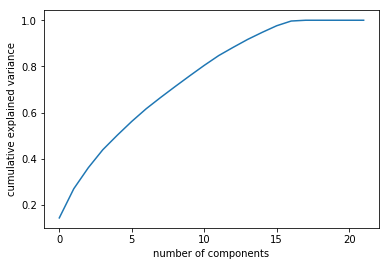

In [75]:
#choisir le nombre de composants pour PCA
pca = PCA().fit(X_1.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


In [ ]:
# d'après le graphe les 12 premiers composants contiennent environ 90% de la variance

In [76]:
#PCA
pca = PCA(n_components=12)
X_2 = pca.fit_transform(X_1)

## DECISION TREE

45.94233933410763
52.17782133178475
63.673054587688725
65.83200251645374
71.19531552458382
73.94671893147503
73.35426345334882
72.86730545876887
73.45891405342626
72.69272648083624
73.18041037553233
72.44870305845915
72.17032036391792
71.43897599690283
71.82225125822687
70.6379452187379
70.0804539295393
70.77756000774293
69.80207123499807
70.11566008517228
69.97604529616724
69.94108110723964
69.87151567944251
69.80170828494
69.73190089043749
70.01064653503677
69.83618854045683
69.59228610143245
69.66233546264033
69.66233546264033
69.73202187379016
69.59264905149051
69.62749225706541
69.62749225706541
69.62749225706541
69.62749225706541
69.62749225706541
69.62749225706541
69.62749225706541


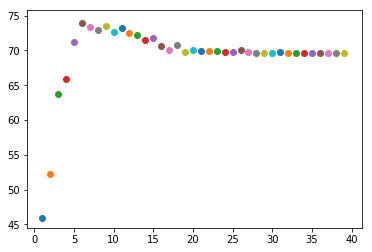

In [24]:
# recherche de la profondeur de l'arbre qui renvoie la meilleure précision du modèle
for i in range(1,40):
    tree = DecisionTreeClassifier(criterion='gini',max_depth=i ,random_state=1)  
    tree .fit(X, y) 
    y_pred =tree .predict(X)
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    score = cross_val_score(tree, X, y, cv=kfold)
    mean=score.mean()*100
    plt.scatter(i, mean)
    print(mean)
plt.show()

In [10]:
# D'après le graphe on constate que le max_depth=6 (où on enregistre la plus grande valeur)

In [25]:
# définir le modèle avec max_depth = 6
tree = DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=1)  
tree.fit(X, y) 
y_pred=tree.predict(X)



# procédure d'évaluation
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

#cross validation
score = cross_val_score(tree, X, y, cv=kfold)
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (score.mean()*100, score.std()*100))

# Les résultats sont résumés à la fois comme la moyenne et l'écart-type de la précision du modèle sur l'ensemble de données.



mean accuracy 73.95% (standard deviation 2.64%)


In [26]:
# trouver les 3 fonctionnalités les plus importantes
importance = tree.feature_importances_
column_names = X.columns.values.tolist()
importances = dict(zip(importance, column_names))

important_features = []

for ii in range(len(importance)):
    if ii < 3:
        important_features.append(importances[sorted(importance, reverse = True)[ii]])
        
print('The 3 most important features in decision tree model are: '+str(important_features))

The 3 most important features in decision tree model are: ['Casualty Class_Pedestrian', 'Road Surface_Dry', 'Road Surface_Wet or Damp']


In [ ]:
#Les 3 valeurs les plus importantes enregistrées sont :
#Casualty Class_Pedestrian
#Road Surface_Dry
#Road Surface_Wet or Damp

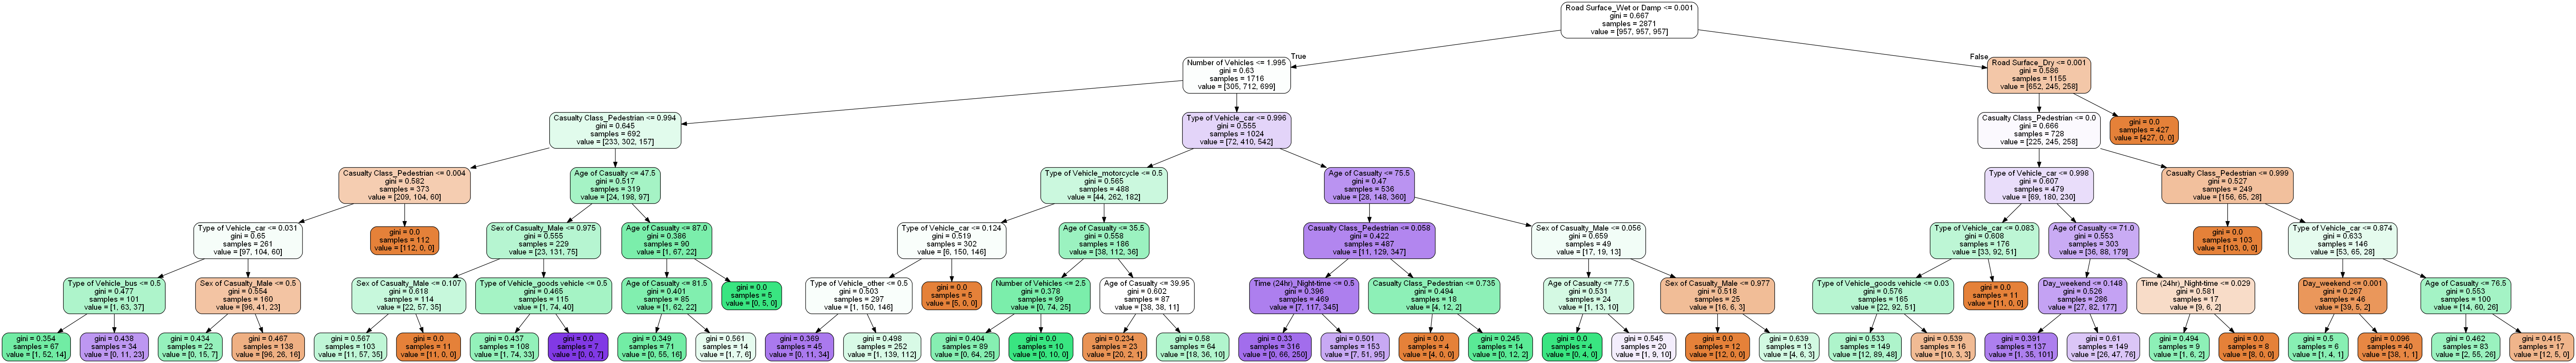

In [29]:
# decision tree
dot_data = export_graphviz(tree,
                            filled=True, 
                            rounded=True,
                            out_file=None,
                            feature_names=list(X))  

graph=graph_from_dot_data(dot_data)

graph.write_png('tree.png')

from IPython.display import Image
Image('tree.png', width=1000)

In [ ]:
#Dans le schéma on voit l arbre de decsison associé à nos données

## RANDOM FOREST

In [80]:
# conversion de valeurs de colonne
y_forest=np.where(y=='Slight',0,np.where(y=='Serious',1,2))
y_forest=pd.DataFrame(data = y_forest, columns = ['Casualty Severity'])

In [82]:

#définition du modèle

forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X, y_forest)
y_pred=tree.predict(X)

# procédure d'évaluation

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

#cross validation
score1 = cross_val_score(forest, X, y_forest, cv=kfold)
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (score1.mean()*100, score1.std()*100))
# Les résultats sont résumés à la fois comme la moyenne et l'écart-type de la précision du modèle sur l'ensemble de données.


mean accuracy 67.15% (standard deviation 3.98%)


## NEURAL NETWORK

In [30]:
#hot encoding
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

dummy_y = utils.np_utils.to_categorical(encoded_y)

In [31]:
# définition du modèle de référence
def baseline_model():
    model = Sequential()
    model.add(Dense(24, input_dim=12, activation='relu'))
    model.add(Dense(12, input_dim=24, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#La fonction d'activation «relu» réduit la probabilité de disparition du gradient
#en utilisant une fonction d'activation «softmax» garantissant que les valeurs de sortie sont dans la plage de 0 et 1 et peuvent être utilisées comme probabilités prédites

#en utilisant une fonction d'activation «softmax» garantissant que les valeurs de sortie sont dans la plage de 0 et 1 et peuvent être utilisées comme probabilités prédites

#Lorsque vous utilisez la perte "categorical_crossentropy", vos cibles doivent être au format catégoriel (par exemple, si vous avez 10 classes, la cible pour chaque échantillon doit être un vecteur à 10 dimensions qui est tout à zéro, sauf pour un 1 à l'index correspondant à la classe de l'échantillon)



# L'optimiseur "Adam" réalise les avantages d'AdaGrad (algorithme de gradient adaptatif) et de RMSProp (propagation quadratique moyenne)



In [32]:
#definition duclassifier
estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
#batch définit le nombre d'échantillons à traiter avant de mettre à jour les paramètres du modèle interne
#epoch définit le nombre de fois que l'algorithme d'apprentissage fonctionnera sur l'ensemble des données de formation

#verbose est un terme de programmation général pour produire de nombreuses sorties de journalisation; mis à 0 (silencieux) pour ne pas ralentir le calcul





In [44]:
#cross validation
results = cross_val_score(estimator, X_2, dummy_y, cv=kfold)
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (results.mean()*100, results.std()*100))
Français
# Les résultats sont résumés à la fois comme la moyenne et l'écart-type de la précision du modèle sur l'ensemble de données.



mean accuracy 72.66% (standard deviation 2.95%)


## KNN

67.78080236159505
68.82573557878435
71.02109949670925
70.77695509097947
71.37025745257452
70.77707607433217
70.39343786295007
71.2643970189702
70.84615756871854
70.63770325203251
70.39404277971352
70.63782423538521
70.56825880758808
70.01076751838947
69.8367934572203
69.10496515679444
68.82609852884242
68.756654084398
68.33877758420441
67.88617886178862
67.22391598915989
66.91044812233837
66.73659504452188
66.77180120015487
66.56346786682154
66.7024777390631
66.17970867208672
66.3887679055362
66.45845431668603
66.21418892760357
66.17922473867597
65.65681862175765
65.41255323267518
65.69129887727449
65.0298828881146
64.7859804490902
64.61164343786294
64.26321138211382
64.33301877661634


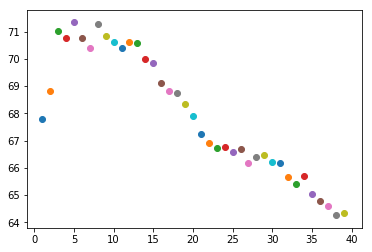

In [33]:

# recherche du nombre de voisins qui renvoie la meilleure précision de modèle


for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i, p=2,
                               metric='minkowski')
    knn.fit(X_2, y)
    results3 = cross_val_score(knn, X_2, y, cv=kfold)
    mean=results3.mean()*100
    plt.scatter(i, mean)
    print(mean)
plt.show()

In [34]:
# définir le modèle avec 5 voisins
knn = KNeighborsClassifier(n_neighbors=5, p=2,
                               metric='minkowski')
knn.fit(X_2, y)

#cross validation
results3 = cross_val_score(knn, X_2, y, cv=kfold)

print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (results3.mean()*100, results3.std()*100))

# Les résultats sont résumés à la fois comme la moyenne et l'écart-type de la précision du modèle sur l'ensemble de données.



mean accuracy 71.37% (standard deviation 2.77%)


## LOGISTIC REGRESSION

* avec PCA

In [35]:
#définition du modèle
lr = LogisticRegression(C=100, random_state=1)


#le terme C est directement lié au paramètre de régularisation λ


lr.fit(X_2, y)

#cross validation
results1 = cross_val_score(lr, X_2, y, cv=kfold)
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (results1.mean()*100, results1.std()*100))
# Les résultats sont résumés à la fois comme la moyenne et l'écart-type de la précision du modèle sur l'ensemble de données.


mean accuracy 53.12% (standard deviation 2.32%)


* sans PCA

In [36]:
#suppression de reference variables
X_3 = X.drop(['Road Surface_Dry', 'Weather Conditions_fine', 'Casualty Class_Driver', 'Type of Vehicle_other'], axis=1)

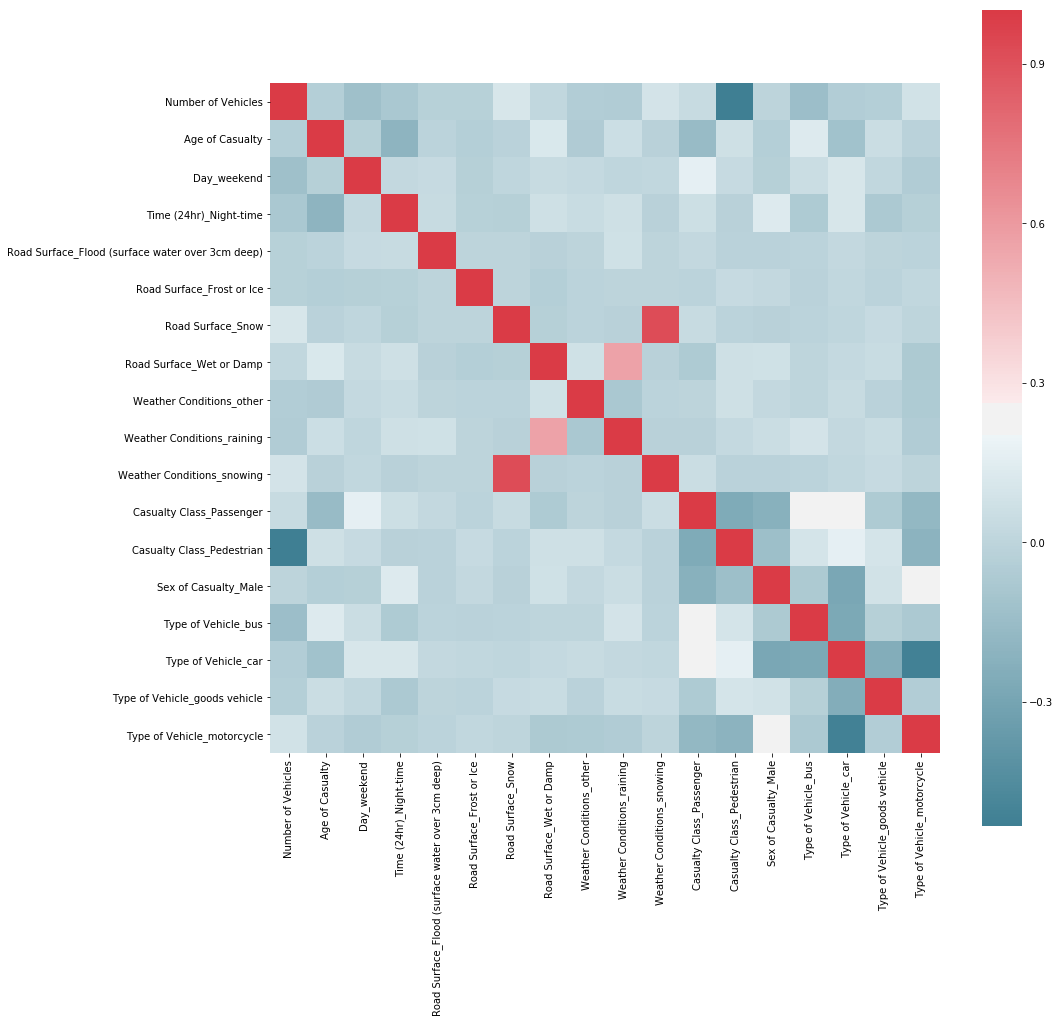

In [39]:
#correlation matrix
f, ax = plt.subplots(figsize=(15, 15))
corr = X_3.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [40]:
#supppression highly correlated variables
X_4 = X_3.drop(['Weather Conditions_other',
 'Weather Conditions_raining',
 'Weather Conditions_snowing'], axis=1)

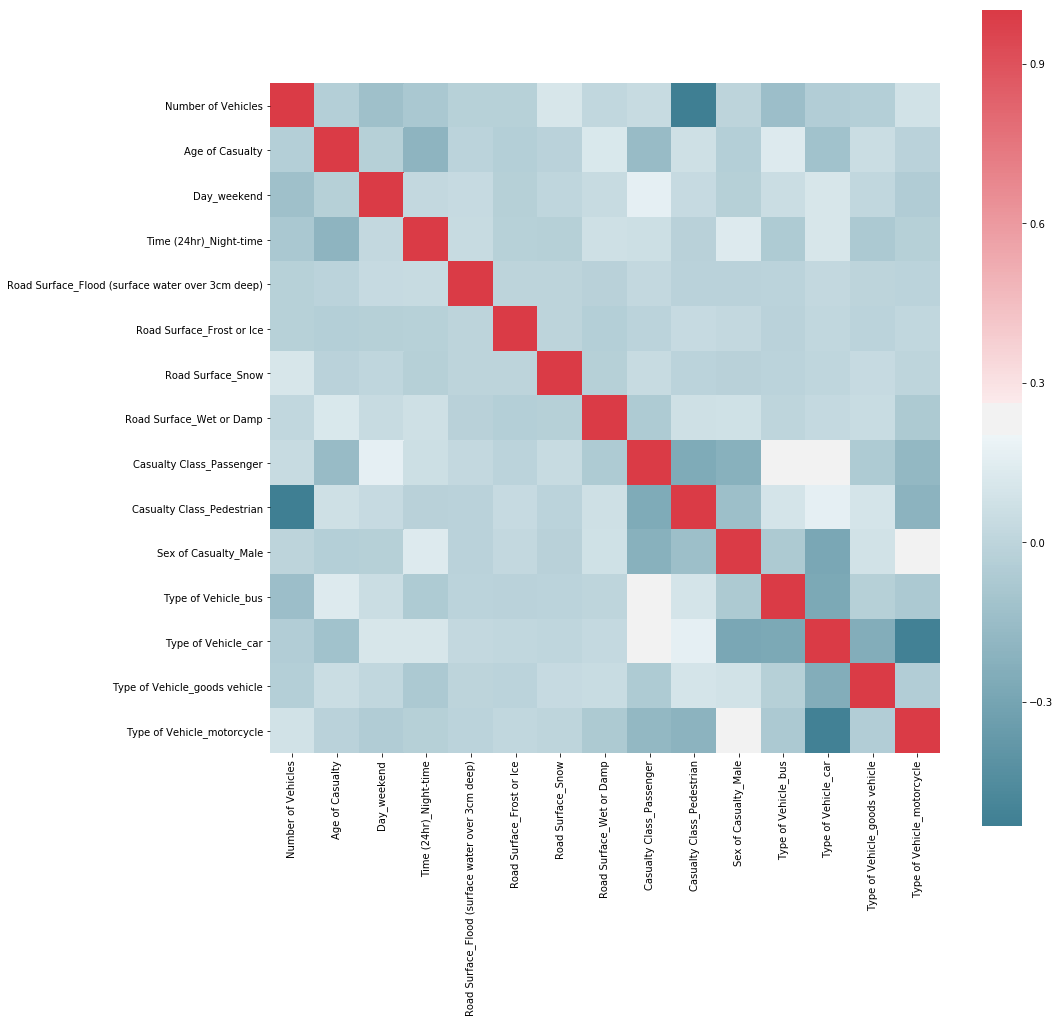

In [41]:
#correlation matrix
f, ax = plt.subplots(figsize=(15, 15))
corr = X_4.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [42]:
#définition du modèle 
lr = LogisticRegression(C=100, random_state=1)
#the term C is directly related to the regularization parameter λ
lr.fit(X_4, y)

#cross validation
results2 = cross_val_score(lr, X_4, y, cv=kfold)
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (results2.mean()*100, results2.std()*100))

# Les résultats sont résumés à la fois comme la moyenne et l'écart-type de la précision du modèle sur l'ensemble de données.



mean accuracy 54.09% (standard deviation 3.03%)


In [43]:
# affichage des coefficients
coef = lr.coef_[0]
table = [coef]
display(HTML(tabulate.tabulate(table, headers=list(X_4), tablefmt='html')))

Number of Vehicles,Age of Casualty,Day_weekend,Time (24hr)_Night-time,Road Surface_Flood (surface water over 3cm deep),Road Surface_Frost or Ice,Road Surface_Snow,Road Surface_Wet or Damp,Casualty Class_Passenger,Casualty Class_Pedestrian,Sex of Casualty_Male,Type of Vehicle_bus,Type of Vehicle_car,Type of Vehicle_goods vehicle,Type of Vehicle_motorcycle
-0.448253,0.0233117,0.117025,0.658311,-2.77232,-3.74593,-2.65296,0.861866,0.457463,0.471216,1.31956,-0.834781,-0.0724014,-0.104937,0.195906


# Résultats

In [62]:
table = [["Decision Tree",round(score.mean()*100,2),round(score.std()*100,2)],
         ["Random Forest",round(score1.mean()*100,2),round(score1.std()*100,2)],
         ["Neural Network",round(results.mean()*100,2),round(results.std()*100,2)],
         ["KNN",round(results3.mean()*100,2) , round(results3.std()*100,2)],
         ["Logistic Regression with PCA", round(results1.mean()*100,2) , round(results1.std()*100,2)],
         ["Logistic Regression without PCA", round(results2.mean()*100,2) , round(results2.std()*100,2)]]
display(HTML(tabulate.tabulate(table, headers=["Algorithm","Mean Accuracy", "Standard Deviation"], tablefmt='html')))

Algorithm,Mean Accuracy,Standard Deviation
Decision Tree,73.95,2.64
Random Forest,67.15,3.98
Neural Network,72.66,2.95
KNN,71.37,2.77
Logistic Regression with PCA,53.12,2.32
Logistic Regression without PCA,54.09,3.03


In [ ]:
#
